In [137]:
import os
DATA_DIR = '../../data'
os.environ['DATA_DIR'] = DATA_DIR
import pandas as pd
from IPython.display import display


# Reviewer 1

In [141]:
truth = read_ground_truth(0)
pred = read_prediction_0()
result1 = merge_truth_and_pred(truth, pred)
result1

,index,concept_id,feature,name,source,judgment
0,0,camcorder,is used to make movies,gpt_3_filtered,gpt,1
1,2,eggplant,grows in the ground,gpt_3_filtered,gpt,1
2,3,belt,is decorative,mcrae,human,2
3,5,doorknob,is shiny,cslb,human,2
4,6,tambourine,has cymbals,cslb,human,1
...,...,...,...,...,...,...
1195,1495,tray,is square,mcrae,human,1
1196,1496,crayfish,has eyes,gpt_3_unfiltered,gpt,1
1197,1497,rock,is small,cslb,human,2
1198,1498,boots,is for men,cslb,human,2


## Explore

<AxesSubplot:>

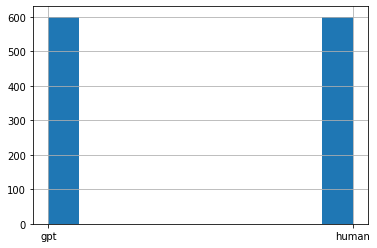

In [142]:
truth['source'].hist()

<AxesSubplot:>

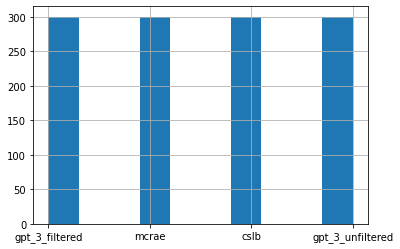

In [143]:
truth['name'].hist()

In [144]:
d = truth[['concept_id', 'feature']].duplicated()

In [145]:
show(result1)

,source,acc,ci,n
0,human,92.58,2.12,593
1,gpt,89.17,2.54,600


,source,acc,ci,n
0,gpt_3_filtered,88.33,3.68,300
1,gpt_3_unfiltered,90.00,3.36,300
2,mcrae,94.61,2.68,297
3,cslb,90.60,3.44,298


# Reviewer 2

In [146]:
truth = read_ground_truth(1)
pred = read_prediction_1()
result2 = merge_truth_and_pred(truth, pred)
result2[result2['judgment'] == 3.0].head(30)

,index,concept_id,feature,name,source,judgment
24,29,outlet,is used to cook,gpt_3_filtered,gpt,3.0
27,33,hamburger,is cooked in an oven,gpt_3_filtered,gpt,3.0
36,45,shoes,has toes,cslb,human,3.0
44,57,coral,is a mineral,gpt_3_filtered,gpt,3.0
62,81,eagle,is used in the army,gpt_3_filtered,gpt,3.0
63,82,banjo,is yellow,gpt_3_filtered,gpt,3.0
70,90,thermos,is made of glass,gpt_3_filtered,gpt,3.0
87,111,duck,is used by hunters,gpt_3_filtered,gpt,3.0
88,113,playing_card,is a tool,gpt_3_filtered,gpt,3.0
122,154,mayonnaise,made of butter,cslb,human,3.0


In [147]:
show(result2)

,source,acc,ci,n
0,human,97.29,1.29,591
1,gpt,88.31,2.53,599


,source,acc,ci,n
0,gpt_3_filtered,87.67,3.71,300
1,gpt_3_unfiltered,89.00,3.41,300
2,mcrae,98.64,1.32,294
3,cslb,95.97,2.22,298


# Both Reviewers

In [148]:

a = result1[['concept_id', 'feature', 'judgment']]
b = result2[['concept_id', 'feature', 'judgment']]

intersection = pd.merge(a, b, on=['concept_id', 'feature'])
intersection

,concept_id,feature,judgment_x,judgment_y
0,camcorder,is used to make movies,1,1.0
1,throne,has arms,1,1.0
2,pipe1,made of bone,1,2.0
3,car,has doors,1,1.0
4,margarita,contains alcohol,1,1.0
...,...,...,...,...
422,dragonfly,has big eyes,1,1.0
423,cabbage,is green,1,1.0
424,cabbage,is green,1,1.0
425,crayfish,has eyes,1,1.0


In [149]:
total = pd.concat([result1, result2])
#total.drop_duplicates(['concept_id', 'feature'])

In [150]:
print(f'Total of {total.shape[0]} concept-feature pairs were judged')

Total of 2400 concept-feature pairs were judged


In [151]:
show(total)

,source,acc,ci,n
0,human,94.76,1.44,974
1,gpt,88.59,1.90,999


,source,acc,ci,n
0,gpt_3_filtered,87.80,2.88,500
1,gpt_3_unfiltered,89.40,2.72,500
2,mcrae,96.49,1.60,484
3,cslb,93.10,2.13,493
